In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
# from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

# Define Functions

### SIR function

In [6]:
"Defining the SIR model to Simulate Infection Spread"

def model_SIR(G,iters, beta, gamma, ini):
    """
    iters: int, number of iterations to run
    beta: float [0,1], infection rate
    gamma: float [0,1], recovery rate
    ini: float [0,1], fraction of nodes to infect at start
    return: lists, trends for S,I,R
    """
    g = G
    # Model selection
    model = ep.SIRModel(g)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('gamma', gamma)
    cfg.add_model_parameter("fraction_infected", ini)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(iters)
    
    # Extracting data from iterations
    S,I,R = [], [], []
    N = G.number_of_nodes()

    for i in range(len(iterations)):
        S.append(iterations[i]['node_count'][0]/N)
        I.append(iterations[i]['node_count'][1]/N)
        R.append(iterations[i]['node_count'][2]/N)
        
    return S,I,R

### Network Statistics Function

In [7]:
"INFO - for Network Statistics"

def info(G, return_values=False):
    # f = nx.degree_histogram(G)
    # plt.hist(f, bins=50)
    
    N = G.number_of_nodes()
    L = G.number_of_edges()
    p = nx.density(G)
    status = nx.is_directed(G)

    # Average degree
    total_k = sum(dict(G.degree).values())
    N = int(G.number_of_nodes())
    avg_k = total_k/N
    
    # Shortest Path
    s_path = nx.average_shortest_path_length(G)
    
    # Node Connectivity 
    node_connectivity = nx.approximation.node_connectivity(G)
    
    # Average Clustering
    avg_clustering_coef = nx.approximation.average_clustering(G)
    
    
    # Display Statistics
    print("Nodes =", N)
    print("Edges =", L)
    print("Directed =",status)
    print("Density =",p)
    print("Average degree =",avg_k)
    print("Average Shortest Path =",s_path)
    print("Average Clustering Coefficient =",avg_clustering_coef)
    print("Node Connectivity =", node_connectivity)
    
    nodes = list(G.nodes())
    edges = list(G.edges())
    
    # Plotting degree Distribution
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(6, 4)) 
    plt.loglog(degrees, degree_freq,'o') 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title("Degree Distribution (log-log)")
    plt.show()
    
    # Clustering
    C = nx.clustering(G)
    c = np.asarray(list(C.values())) #Convert dict to list to array
    plt.hist(c, bins=10, range=[0, 1])
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Nodes')
    plt.title("Clustering")
    plt.show()
    
    
    if return_values == True:
        return avg_k, p, N, L, nodes, edges
    else:
        return

# Import Data

### Importing Real and Generating Syntheitic Networks

In [8]:
"IMPORT Real Network"

G = nx.read_edgelist("G_top_proj_LCC.edgelist")

"GENERATE ER and BA Networks"

n = G.number_of_nodes()
p = nx.density(G) # from info of G

G_ER = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
G_BA = nx.barabasi_albert_graph(n, m=50)

Nodes = 2935
Edges = 142097
Directed = False
Density = 0.03300248859346277
Average degree = 96.82930153321976
Average Shortest Path = 4.144452921687692
Average Clustering Coefficient = 0.763
Node Connectivity = 1


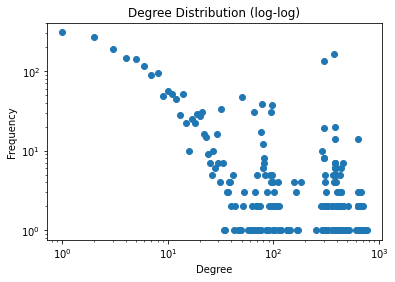

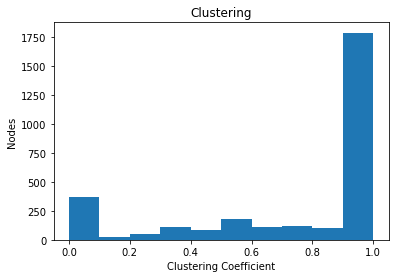

Nodes = 2935
Edges = 142294
Directed = False
Density = 0.03304824248167232
Average degree = 96.96354344122658
Average Shortest Path = 2.0063595582078877
Average Clustering Coefficient = 0.036
Node Connectivity = 59


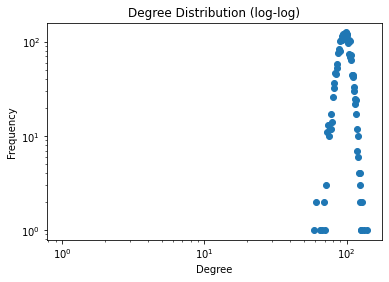

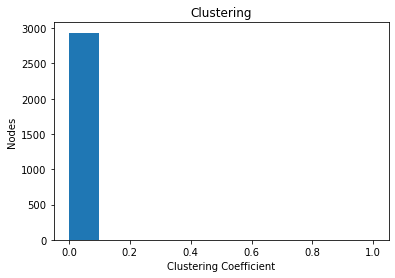

Nodes = 2935
Edges = 144250
Directed = False
Density = 0.033502529818412806
Average degree = 98.29642248722317
Average Shortest Path = 2.025387601625308
Average Clustering Coefficient = 0.076
Node Connectivity = 50


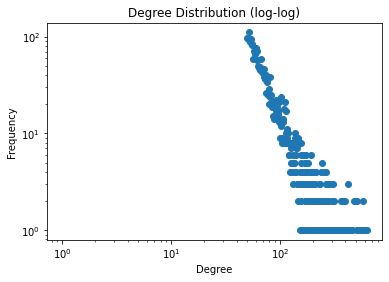

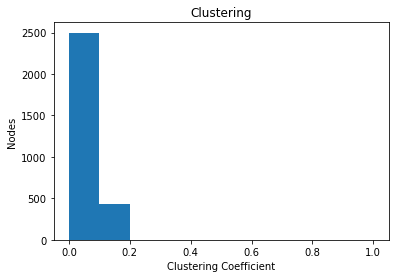

In [9]:
"DRAW Networks"

pos = nx.spring_layout(G, scale=2)
pos_ER = nx.spring_layout(G_ER, scale=2)
pos_BA = nx.spring_layout(G_BA, scale=2)

# plt.figure(1)
info(G)
# nx.draw(G, width=0.1, node_size=5, pos=pos)

# plt.figure(2)
info(G_ER)
# nx.draw(G_ER, width=0.1, node_size=5, pos=pos_ER)

# plt.figure(3)
info(G_BA)
# nx.draw(G_BA, width=0.1, node_size=5, pos=pos_BA)

# plt.show()

# Results

### A) Results at various Parameters

In [81]:
"Function to plot at various parameters"

def SIR(G,title):
    '''
    G: graph
    title: string
    '''
    Beta_range = [0.01,0.05,0.1]
    Gamma_range = [0.01,0.05,0.1]

    fig, ax = plt.subplots(len(Beta_range), len(Gamma_range)) 
    fig.set_size_inches(3*len(Beta_range),3*len(Gamma_range))
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle(title+'\nSIR at various Infection Rate \u03B2 and Recovery Rate \u03B3',size=16, y=1)
    fig.supylabel('<-------------- Infection Rate --------------->', x = 0.05)
    fig.supxlabel('<-------------- Recovery Rate --------------->', y= 0.05)

    for i in range(0,len(Beta_range)):
        for j in range(0,len(Gamma_range)):
            S,I,R = model_SIR(G, iters=200, beta=Beta_range[i], gamma=Gamma_range[j], ini=0.01)
            ax[i][j].axis("off")
            ax[i][j].plot(S, 'b:', label=f"S", )
            ax[i][j].plot(I, 'r:', label=f"I")
            ax[i][j].plot(R, 'g:', label=f"R")

            ax[i][j].title.set_text(f"\u03B2 {Beta_range[i]}   \u03B3 {Gamma_range[j]}")
            ax[i][j].legend(loc=7)

    plt.show()

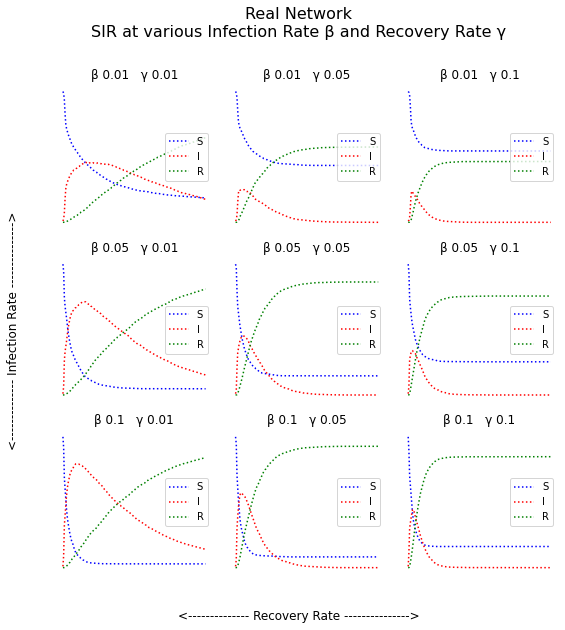

In [82]:
SIR(G, "Real Network")

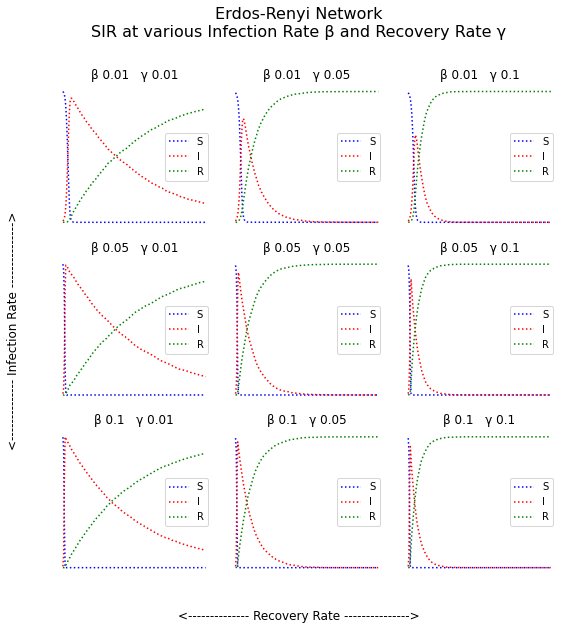

In [83]:
SIR(G_ER, "Erdos-Renyi Network")

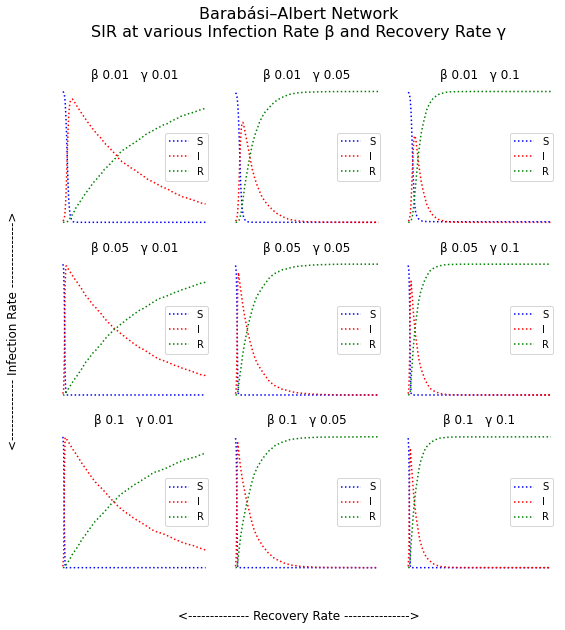

In [84]:
SIR(G_BA, "Barabási–Albert Network")

### B) Comparison at same Parameters

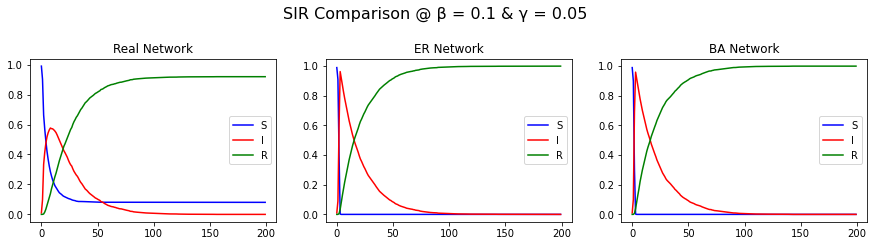

In [87]:
beta = 0.1
gamma=0.05

# Generating Trends for each Network
S,I,R = model_SIR(G, iters=200, beta=beta, gamma=gamma, ini=0.01)
S_ER,I_ER,R_ER = model_SIR(G_ER, iters=200, beta=beta, gamma=gamma, ini=0.01)
S_BA,I_BA,R_BA = model_SIR(G_BA, iters=200, beta=beta, gamma=gamma, ini=0.01)

# Making 3 Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,3)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Susceptible Comparison
ax[0].plot(S,'b',label="S")
ax[0].plot(I,'r',label="I")
ax[0].plot(R,'g',label="R")
ax[0].title.set_text("Real Network")
ax[0].legend()

# Plotting Infection Comparison
ax[1].plot(S_ER,'b',label="S")
ax[1].plot(I_ER,'r',label="I")
ax[1].plot(R_ER,'g',label="R")
ax[1].title.set_text("ER Network")
ax[1].legend()

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.show()

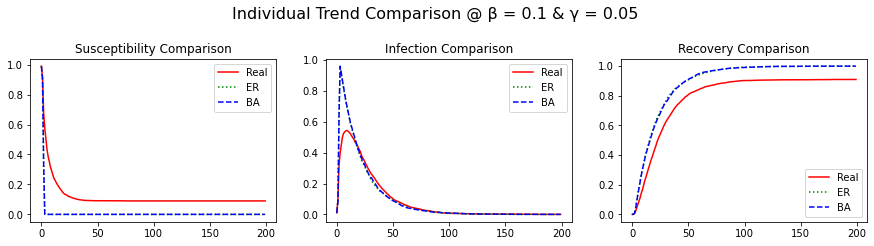

In [85]:
beta = 0.1
gamma=0.05

# Generating Trends for each Network
S,I,R = model_SIR(G, iters=200, beta=beta, gamma=gamma, ini=0.01)
S_ER,I_ER,R_ER = model_SIR(G_ER, iters=200, beta=beta, gamma=gamma, ini=0.01)
S_BA,I_BA,R_BA = model_SIR(G_BA, iters=200, beta=beta, gamma=gamma, ini=0.01)

# Making 3 Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,3)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Susceptible Comparison
ax[0].plot(S,'r',label="Real")
ax[0].plot(S_ER,'g:',label="ER")
ax[0].plot(S_BA,'b--',label="BA")
ax[0].title.set_text("Susceptibility Comparison")
ax[0].legend()

# Plotting Infection Comparison
ax[1].plot(I,'r',label="Real")
ax[1].plot(I_ER,'g:',label="ER")
ax[1].plot(I_BA,'b--',label="BA")
ax[1].title.set_text("Infection Comparison")
ax[1].legend()

# Plotting Recovery Comparison
ax[2].plot(R,'r',label="Real")
ax[2].plot(R_ER,'g:',label="ER")
ax[2].plot(R_BA,'b--',label="BA")
ax[2].title.set_text("Recovery Comparison")
ax[2].legend()

# Main Title
fig.suptitle(f"Individual Trend Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.show()

# SIS MODEL

In [133]:
"Defining the SIS model to Simulate Infection Spread"

def model_SIS(G,iters, beta, Lambda, ini=0.01):
    """
    iters: int, number of iterations to run
    beta: float [0,1], infection rate
    Lambda: float [0,1], recovery rate
    ini: float [0,1], fraction of nodes to infect at start
    return: lists, trends for S,I
    """
    g = G
    # Model selection
    model = ep.SISModel(g)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('lambda', Lambda)
    cfg.add_model_parameter("fraction_infected", ini)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(iters)
    
    # Extracting data from iterations
    S,I = [],[]
    N = G.number_of_nodes()

    for i in range(iters):
        S.append(iterations[i]['node_count'][0]/N)
        I.append(iterations[i]['node_count'][1]/N)
        
    return S,I

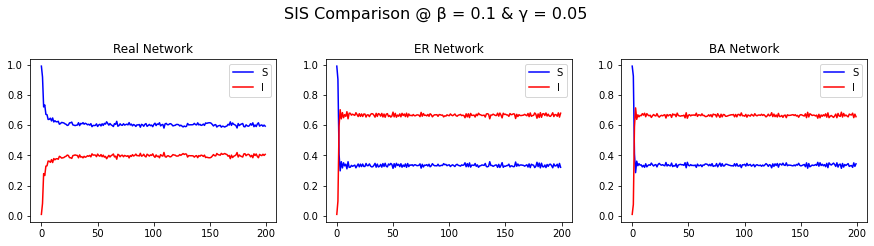

In [134]:
beta = 0.1
Lambda=0.5

# Generating Trends for each Network
S,I = model_SIS(G, iters=200, beta=beta, Lambda=Lambda, ini=0.01)
S_ER,I_ER = model_SIS(G_ER, iters=200, beta=beta, Lambda=Lambda, ini=0.01)
S_BA,I_BA = model_SIS(G_BA, iters=200, beta=beta, Lambda=Lambda, ini=0.01)

# Making 3 Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,3)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Susceptible Comparison
ax[0].plot(S,'b',label="S")
ax[0].plot(I,'r',label="I")
ax[0].title.set_text("Real Network")
ax[0].legend()

# Plotting Infection Comparison
ax[1].plot(S_ER,'b',label="S")
ax[1].plot(I_ER,'r',label="I")
ax[1].title.set_text("ER Network")
ax[1].legend()

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIS Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.show()

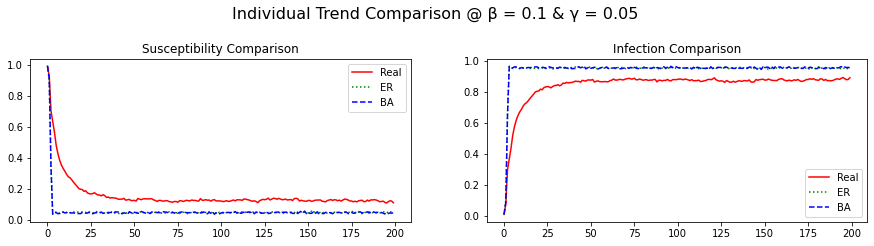

In [137]:
beta = 0.1
gamma=0.05

# Generating Trends for each Network
S,I = model_SIS(G, iters=200, beta=beta, Lambda=gamma, ini=0.01)
S_ER,I_ER = model_SIS(G_ER, iters=200, beta=beta, Lambda=gamma, ini=0.01)
S_BA,I_BA = model_SIS(G_BA, iters=200, beta=beta, Lambda=gamma, ini=0.01)

# Making 3 Subplots
fig, ax = plt.subplots(1,2) 
fig.set_size_inches(15,3)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Susceptible Comparison
ax[0].plot(S,'r',label="Real")
ax[0].plot(S_ER,'g:',label="ER")
ax[0].plot(S_BA,'b--',label="BA")
ax[0].title.set_text("Susceptibility Comparison")
ax[0].legend()

# Plotting Infection Comparison
ax[1].plot(I,'r',label="Real")
ax[1].plot(I_ER,'g:',label="ER")
ax[1].plot(I_BA,'b--',label="BA")
ax[1].title.set_text("Infection Comparison")
ax[1].legend()


# Main Title
fig.suptitle(f"Individual Trend Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.show()

In [138]:
"Function to plot at various parameters"

def SIS(G,title):
    '''
    G: graph
    title: string
    '''
    Beta_range = [0.01,0.05,0.1]
    Gamma_range = [0.01,0.05,0.1]

    fig, ax = plt.subplots(len(Beta_range), len(Gamma_range)) 
    fig.set_size_inches(3*len(Beta_range),3*len(Gamma_range))
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle(title+'\nSIS at various Infection Rate \u03B2 and Recovery Rate \u03B3',size=16, y=1)
    fig.supylabel('<-------------- Infection Rate --------------->', x = 0.05)
    fig.supxlabel('<-------------- Recovery Rate --------------->', y= 0.05)

    for i in range(0,len(Beta_range)):
        for j in range(0,len(Gamma_range)):
            S,I = model_SIS(G, iters=200, beta=Beta_range[i], Lambda=Gamma_range[j], ini=0.01)
            ax[i][j].axis("off")
            ax[i][j].plot(S, 'b:', label=f"S", )
            ax[i][j].plot(I, 'r:', label=f"I")

            ax[i][j].title.set_text(f"\u03B2 {Beta_range[i]}   \u03B3 {Gamma_range[j]}")
            ax[i][j].legend(loc=7)

    plt.show()

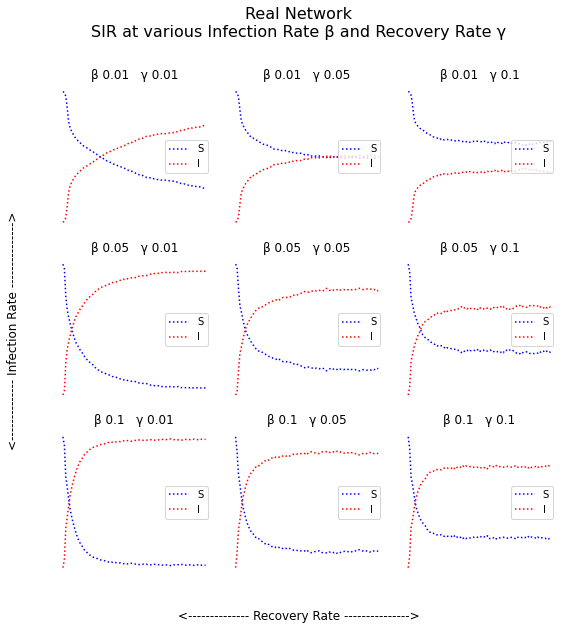

In [124]:
SIS(G, "Real Network")

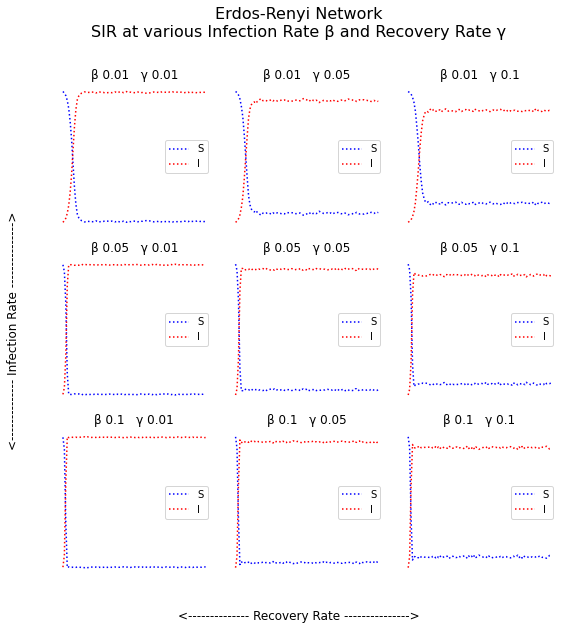

In [126]:
SIS(G_ER, "Erdos-Renyi Network")

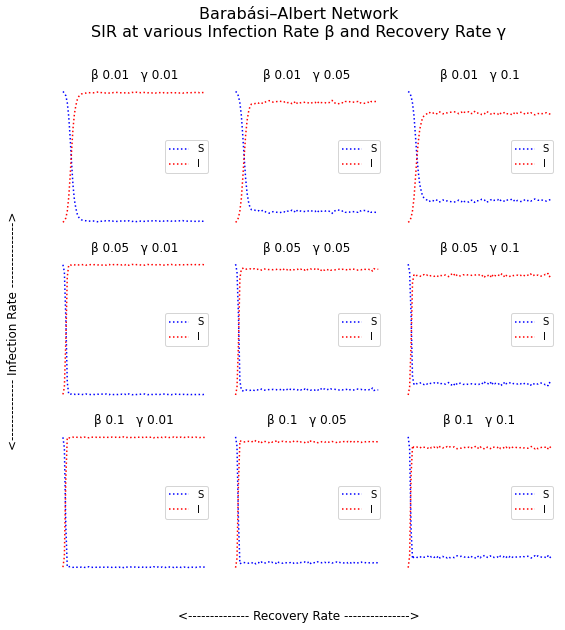

In [127]:
SIS(G_BA, "Barabási–Albert Network")